In [33]:
import os
import math
from sympy import *
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit, least_squares
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
import matplotlib.pyplot as plt
import lmfit


In [34]:
def load_csv_data(file_name, subdir=''):
    """
    Loads data from .csv file in to DataFrame

    :param file_name: .csv file name in string
    :param subdir: optional parameter to specify the subdirectory of the file
    :return: extracted data in DataFrame
    """

    file_dir = os.path.realpath('../')
    print(file_dir)
    for root, dirs, files in os.walk(file_dir):
        if root.endswith(subdir):
            for name in files:
                if name == file_name:
                    file_path = os.path.join(root, name)

    df = pd.read_csv(file_path)

    return df

In [54]:
def LF_Noise(component = 1):
    """ Inital parameters and bounds for each paramter according to LF (0-0.01Hz)in the paper
    """
    LMparams = Parameters()
    LMparams.add('A1_FS', value = 10.)#, min = -10, max = 10)
    LMparams.add('A2_FS', value = 10.)#, min = -10, max = 10)
    LMparams.add('A3_FS', value = 10.)#, min = -10, max = 10)
    LMparams.add('w1_FS', value = 0, min = 0, max = 0.01*2*math.pi)
    LMparams.add('w2_FS', value = 0.005*2*math.pi, min = 0, max = 0.01*2*math.pi)
    LMparams.add('w3_FS', value = 0.01*2*math.pi, min = 0, max = 0.01*2*math.pi)
    LMparams.add('phi1_FS', value = 0, min = -math.pi, max = math.pi)
    LMparams.add('phi2_FS', value = 0, min = -math.pi, max = math.pi)
    LMparams.add('phi3_FS', value = 0, min = -math.pi, max = math.pi)

    # if component == 1:
    #     LMparams.add('A_FS', value = 1.)#, min = -10, max = 10)
    #     LMparams.add('w_FS', value = 1., min = 0, max = 0.01*2*math.pi)
    #     LMparams.add('phi_FS', value = 0, min = -math.pi, max = math.pi)
    # elif component == 2:
    #     LMparams.add('A_FS', value = 1.)#, min = -10, max = 10)
    #     LMparams.add('w_FS', value = 1, min = 0, max = 0.01*2*math.pi)
    #     LMparams.add('phi_FS', value = 0, min = -math.pi, max = math.pi)
    # elif component == 3:
    #     LMparams.add('A_FS', value = 1.)#, min = -10, max = 10)
    #     LMparams.add('w_FS', value = 0.01*2*math.pi, min = 0, max = 0.01*2*math.pi)
    #     LMparams.add('phi_FS', value = 0, min = -math.pi, max = math.pi)

    return LMparams

def MF_Noise(component = 1):
    """ Inital parameters and bounds for each paramter according to MF (0.01-0.25Hz) in the paper
    """
    LMparams = Parameters()
    LMparams.add('A1_FS', value = 10.)#, min = -10, max = 10)
    LMparams.add('A2_FS', value = 10.)#, min = -10, max = 10)
    LMparams.add('A3_FS', value = 10.)#, min = -10, max = 10)
    LMparams.add('w1_FS', value = 0.02*2*math.pi, min = 0.01*2*math.pi, max = 0.25*2*math.pi)
    LMparams.add('w2_FS', value = 0.03*2*math.pi, min = 0.01*2*math.pi, max = 0.25*2*math.pi)
    LMparams.add('w3_FS', value = 0.03*2*math.pi, min = 0.01*2*math.pi, max = 0.25*2*math.pi)
    LMparams.add('phi1_FS', value = 0, min = -math.pi, max = math.pi)
    LMparams.add('phi2_FS', value = 0, min = -math.pi, max = math.pi)
    LMparams.add('phi3_FS', value = 0, min = -math.pi, max = math.pi)

    # if component == 1:
    #     LMparams.add('A_FS', value = 1.)#, min = -10, max = 10)
    #     LMparams.add('w_FS', value = 0.02*2*math.pi, min = 0.01*2*math.pi, max = 0.25*2*math.pi)
    #     LMparams.add('phi_FS', value = 0, min = -math.pi, max = math.pi)
    # elif component == 2:
    #     LMparams.add('A_FS', value = 1.)#, min = -10, max = 10)
    #     LMparams.add('w_FS', value = 0.03*2*math.pi, min = 0.01*2*math.pi, max = 0.25*2*math.pi)
    #     LMparams.add('phi_FS', value = 0, min = -math.pi, max = math.pi)
    # elif component == 3:
    #     LMparams.add('A_FS', value = 1.)#, min = -10, max = 10)
    #     LMparams.add('w_FS', value = 0.03*2*math.pi, min = 0.01*2*math.pi, max = 0.25*2*math.pi)
    #     LMparams.add('phi_FS', value = 0, min = -math.pi, max = math.pi)

    return LMparams

def HF_Noise(component = 1):
    """ Inital parameters and bounds for each paramter according to HF (0.25-0.5Hz) in the paper
    """
    LMparams = Parameters()
    LMparams.add('A1_FS', value = 1.)#, min = -10, max = 10)
    LMparams.add('A2_FS', value = 1.)#, min = -10, max = 10)
    LMparams.add('A3_FS', value = 1.)#, min = -10, max = 10)
    LMparams.add('w1_FS', value = 0.25*2*math.pi, min = 0.25*2*math.pi, max = 0.5*2*math.pi)
    LMparams.add('w2_FS', value = 0.375*2*math.pi, min = 0.25*2*math.pi, max = 0.5*2*math.pi)
    LMparams.add('w3_FS', value = 0.5*2*math.pi, min = 0.25*2*math.pi, max = 0.5*2*math.pi)
    LMparams.add('phi1_FS', value = 0, min = -math.pi, max = math.pi)
    LMparams.add('phi2_FS', value = 0, min = -math.pi, max = math.pi)
    LMparams.add('phi3_FS', value = 0, min = -math.pi, max = math.pi)

    # if component == 1:
    #     LMparams.add('A_FS', value = 1.)#, min = -10, max = 10)
    #     LMparams.add('w_FS', value = 0.25*2*math.pi, min = 0.25*2*math.pi, max = 0.5*2*math.pi)
    #     LMparams.add('phi_FS', value = 0, min = -math.pi, max = math.pi)
    # elif component == 2:
    #     LMparams.add('A_FS', value = 1.)#, min = -10, max = 10)
    #     LMparams.add('w_FS', value = 0.375*2*math.pi, min = 0.25*2*math.pi, max = 0.5*2*math.pi)
    #     LMparams.add('phi_FS', value = 0, min = -math.pi, max = math.pi)
    # elif component == 3:
    #     LMparams.add('A_FS', value = 1.)#, min = -10, max = 10)
    #     LMparams.add('w_FS', value = 0.5*2*math.pi, min = 0.25*2*math.pi, max = 0.5*2*math.pi)
    #     LMparams.add('phi_FS', value = 0, min = -math.pi, max = math.pi)

    return LMparams

In [ ]:
class DS(object):
    """ Module 2: Drive Scenario
    """
    def __init__(self):
        

In [ ]:
class DC(object):
    """ Module 1: Drive Cycle
    """
    def __init__(self, dc_length):
        
        t_DC = dc_length
        sum_t_DS = 0
        while t_DC > sum_t_DS:
            pass
        pass


In [58]:
class DP(object):
    """ Module 3: Drive Pulse
    """
    def __init__(self,t,y):
        # velocity_noise = None
        # accel = None
        # cruise = None
        # decel = None
        # idle = None
        # t_DP = None
        self.t = t
        self.y = y

    def subtract_avg(self):
        """Removes the average speed from the observations
        """
        self.y = self.y - self.y.mean()
        return self.y

    def subtract(self, array):
        self.y = self.y - array
        return self.y

    def single_component(self, A_i_FS, w_i_FS, phi_i_FS):
        """ Returns a single velocity noise component as described in the sum of eqn (5)
        """
        return A_i_FS * np.sin( (w_i_FS*self.t) + phi_i_FS )
     
    def eqn_model(self, params):
        """ Returns the velocity noise FS model as described in eqn (5)
        """
        # put all the paramters in a list
        A_FS = [params['A1_FS'],params['A2_FS'],params['A3_FS']]
        w_FS = [params['w1_FS'],params['w2_FS'],params['w3_FS']]
        phi_FS = [params['phi1_FS'],params['phi2_FS'],params['phi3_FS']]

        # equation (5)
        model = self.single_component(A_FS[0],w_FS[0], phi_FS[0])
        model += self.single_component(A_FS[1],w_FS[1], phi_FS[1])
        model += self.single_component(A_FS[2],w_FS[2], phi_FS[2])

        return model

    def fnc2min(self, params):
        """ Returns the residuals (eqn 7) for the model
        """
        return (self.y - self.eqn_model(params))

    # def fnc2min(self, params):
    #     """ Returns the residuals (eqn 7) for the model
    #     """
    #     return (self.y - self.single_component(params['A_FS'], params['w_FS'], params['phi_FS']))


    def NLLSR(self, LMparams):
        """ Returns the result of the NLLSR using LMFit
        """
        LMFitmin = Minimizer(self.fnc2min, LMparams)
        LMFitResult = LMFitmin.minimize(method='leastsq')
        lmfit.printfuncs.report_fit(LMFitResult.params)

        return LMFitResult

    



/Users/koeboonshyang/Documents/GitHub/MEng-V2I


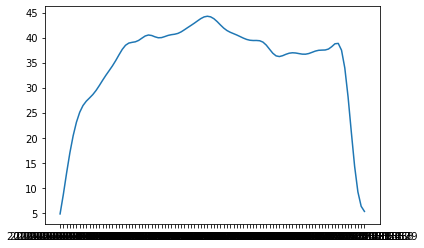

[[Variables]]
    A_FS:    2.45128998 +/- 0.25590063 (10.44%) (init = 1)
    w_FS:    0.06283185 +/- 0.01099832 (17.50%) (init = 0.06283185)
    phi_FS:  0.93492222 +/- 0.38467040 (41.14%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(w_FS, phi_FS) = -0.956
    C(A_FS, w_FS)   = -0.366
    C(A_FS, phi_FS) =  0.328


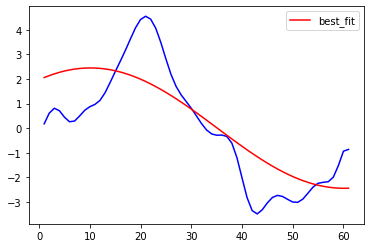

[[Variables]]
    A_FS:   -2.7661e-08 +/- 0.27435445 (991854537.62%) (init = 1)
    w_FS:    0.06283183 +/- 402958.876 (641329236.99%) (init = 0.06283185)
    phi_FS:  1.9177e-04 +/- 15275056.9 (7965128043396.95%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(w_FS, phi_FS) = -0.840
    C(A_FS, phi_FS) =  0.160
    C(A_FS, w_FS)   = -0.135


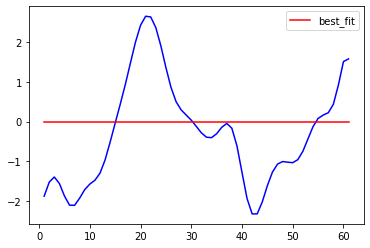

[[Variables]]
    A_FS:    2.9686e-08 +/- 0.27534460 (927528038.41%) (init = 1)
    w_FS:    0.06283185 +/- 361737.855 (575723678.02%) (init = 0.06283185)
    phi_FS:  6.1011e-09 +/- 13808003.3 (226320869148273792.00%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(w_FS, phi_FS) = -0.826
    C(A_FS, phi_FS) = -0.181
    C(A_FS, w_FS)   =  0.149


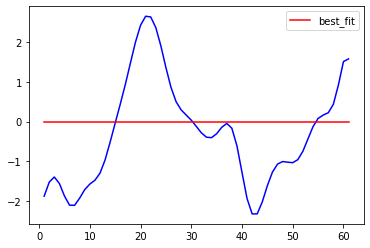

In [30]:
if __name__ == '__main__':
    LMparams = LF_Noise(1)

    # loads the csv file
    subdir = 'caltrans_processed_drive_cycles/data/1035198_1'
    file_name = '2012-05-22.csv'
    data = load_csv_data(file_name, subdir)
    # get a slice of the data with a relatively long driving pulse
    data = data.iloc[1002:1096,:]
    plt.plot(data.loc[:,'timestamp'], data.loc[:,'speed_mph'])
    plt.show()
    # get the slice of ONLY cruising period
    cruising_data = data.iloc[25:86,:]

    # create a numpy array of just t values starting at t=1
    t = np.linspace(1,len(cruising_data),len(cruising_data))
    # create a numpy array of speed_mph values
    y = cruising_data.loc[:,'speed_mph'].to_numpy()
    # initialise the DP object
    dp_obj = DP(t,y)
    # deduct the average from the cruising period speed values (from fig3a to fig3b) and store as y
    y = dp_obj.subtract_avg()

    original_y = y
    
    # perform NLLSR with the initial parameters suggested by LMParams
    hi = dp_obj.NLLSR(LF_Noise(1))
    plt.plot(t,y,'b')
    # yy = hi.params['A1_FS'] * np.sin( (hi.params['w1_FS']*t) + hi.params['phi1_FS'])
    # yy = yy + hi.params['A2_FS'] * np.sin( (hi.params['w2_FS']*t) + hi.params['phi2_FS'])
    # yy = yy + hi.params['A3_FS'] * np.sin( (hi.params['w3_FS']*t) + hi.params['phi3_FS'])
    yy = dp_obj.single_component(hi.params['A_FS'],hi.params['w_FS'],hi.params['phi_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
    # remove previous component of LF spectrum
    y = dp_obj.subtract(yy)
    reconstructed = yy

    # perform NLLSR with the initial parameters suggested by LMParams
    hi = dp_obj.NLLSR(LF_Noise(2))
    plt.plot(t,y,'b')
    yy = dp_obj.single_component(hi.params['A_FS'],hi.params['w_FS'],hi.params['phi_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
    # remove previous component of LF spectrum
    y = dp_obj.subtract(yy)
    reconstructed += yy

    # perform NLLSR with the initial parameters suggested by LMParams
    hi = dp_obj.NLLSR(LF_Noise(3))
    plt.plot(t,y,'b')
    yy = dp_obj.single_component(hi.params['A_FS'],hi.params['w_FS'],hi.params['phi_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
    # remove previous component of LF spectrum
    y = dp_obj.subtract(yy)
    reconstructed += yy


[[Variables]]
    A_FS:    1.74757600 +/- 0.10643355 (6.09%) (init = 1)
    w_FS:    0.15694296 +/- 0.00363553 (2.32%) (init = 0.1256637)
    phi_FS: -2.18641860 +/- 0.13622592 (6.23%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(w_FS, phi_FS) = -0.894
    C(A_FS, w_FS)   = -0.109


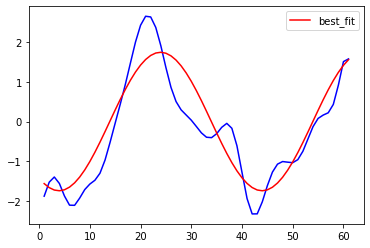

[[Variables]]
    A_FS:    0.43724334 +/- 0.08918427 (20.40%) (init = 1)
    w_FS:    0.25418177 +/- 0.01174842 (4.62%) (init = 0.1884956)
    phi_FS: -3.14159265 +/- 0.41914613 (13.34%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(w_FS, phi_FS) = -0.872
    C(A_FS, w_FS)   =  0.112


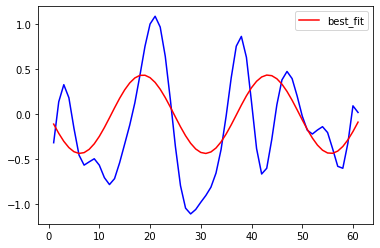

[[Variables]]
    A_FS:   -0.13872894 +/- 0.08904622 (64.19%) (init = 1)
    w_FS:    0.22356033 +/- 0.03406047 (15.24%) (init = 0.1884956)
    phi_FS: -1.16459014 +/- 1.20108239 (103.13%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(w_FS, phi_FS) = -0.856


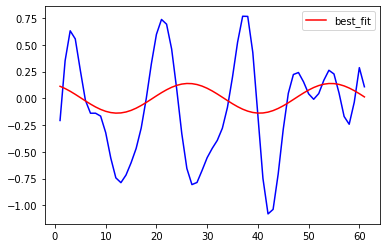

In [31]:
    # perform NLLSR with the initial parameters suggested by LMParams
    hi = dp_obj.NLLSR(MF_Noise(1))
    plt.plot(t,y,'b')
    yy = dp_obj.single_component(hi.params['A_FS'],hi.params['w_FS'],hi.params['phi_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
    # remove previous component of MF spectrum
    y = dp_obj.subtract(yy)
    reconstructed += yy

    # perform NLLSR with the initial parameters suggested by LMParams
    hi = dp_obj.NLLSR(MF_Noise(2))
    plt.plot(t,y,'b')
    yy = dp_obj.single_component(hi.params['A_FS'],hi.params['w_FS'],hi.params['phi_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
    # remove previous component of MF spectrum
    y = dp_obj.subtract(yy)
    reconstructed += yy

    # perform NLLSR with the initial parameters suggested by LMParams
    hi = dp_obj.NLLSR(MF_Noise(3))
    plt.plot(t,y,'b')
    yy = dp_obj.single_component(hi.params['A_FS'],hi.params['w_FS'],hi.params['phi_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
    # remove previous component of MF spectrum
    y = dp_obj.subtract(yy)
    reconstructed += yy

[[Variables]]
    A_FS:   -0.02725659 +/- 0.08725621 (320.13%) (init = 1)
    w_FS:    1.57079633 +/- 0.18236159 (11.61%) (init = 1.570796)
    phi_FS: -0.73809238 +/- 6.49913929 (880.53%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(w_FS, phi_FS) = -0.870


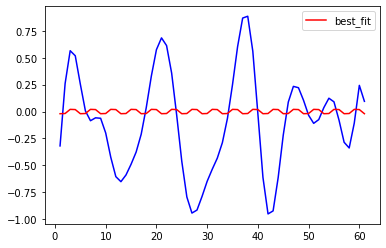

[[Variables]]
    A_FS:   -0.01644406 +/- 0.08681062 (527.91%) (init = 1)
    w_FS:    2.39534873 +/- 0.30677755 (12.81%) (init = 2.356194)
    phi_FS: -0.96736249 +/- 10.9041476 (1127.20%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(w_FS, phi_FS) = -0.872


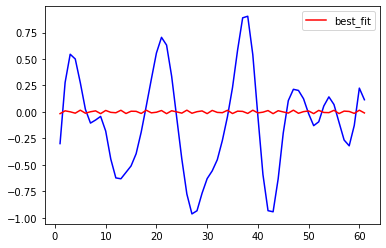

[[Variables]]
    A_FS:    1.04388120 +/- 220256.365 (21099754.08%) (init = 1)
    w_FS:    3.14119486 +/- 83.9392984 (2672.21%) (init = 3.141593)
    phi_FS:  0.01837679 +/- 3877.70756 (21101113.43%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(w_FS, phi_FS) = -1.000
    C(A_FS, phi_FS) = -1.000
    C(A_FS, w_FS)   =  1.000


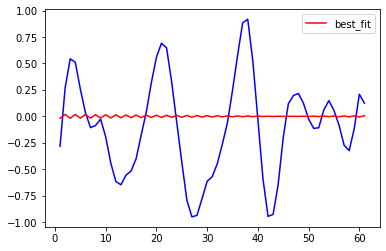

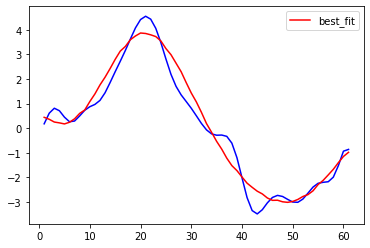

In [32]:
    # perform NLLSR with the initial parameters suggested by LMParams
    hi = dp_obj.NLLSR(HF_Noise(1))
    plt.plot(t,y,'b')
    yy = dp_obj.single_component(hi.params['A_FS'],hi.params['w_FS'],hi.params['phi_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
    # remove previous component of MF spectrum
    y = dp_obj.subtract(yy)
    reconstructed += yy

    # perform NLLSR with the initial parameters suggested by LMParams
    hi = dp_obj.NLLSR(HF_Noise(2))
    plt.plot(t,y,'b')
    yy = dp_obj.single_component(hi.params['A_FS'],hi.params['w_FS'],hi.params['phi_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
    # remove previous component of MF spectrum
    y = dp_obj.subtract(yy)
    reconstructed += yy

    # perform NLLSR with the initial parameters suggested by LMParams
    hi = dp_obj.NLLSR(HF_Noise(3))
    plt.plot(t,y,'b')
    yy = dp_obj.single_component(hi.params['A_FS'],hi.params['w_FS'],hi.params['phi_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
    # remove previous component of MF spectrum
    y = dp_obj.subtract(yy)
    reconstructed += yy

    plt.plot(t,original_y,'b')
    plt.plot(t, reconstructed,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()


/Users/koeboonshyang/Documents/GitHub/MEng-V2I


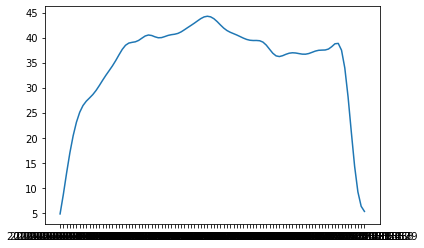

[[Variables]]
    A1_FS:    9.25426247 +/- 15059.9254 (162735.02%) (init = 10)
    A2_FS:    5.34052172 +/- 8594403.98 (160928172.06%) (init = 10)
    A3_FS:    16.3755452 +/- 4821491.57 (29443242.99%) (init = 10)
    w1_FS:    0.06283131 +/- 1087.18768 (1730327.96%) (init = 0)
    w2_FS:    0.00766234 +/- 3839.26569 (50105652.90%) (init = 0.03141593)
    w3_FS:    0.01635283 +/- 1689.61058 (10332218.48%) (init = 0.06283185)
    phi1_FS:  1.03832312 +/- 493.536036 (47532.03%) (init = 0)
    phi2_FS: -0.54406457 +/- 773154.005 (142107029.38%) (init = 0)
    phi3_FS: -0.44904269 +/- 80760.5691 (17985053.70%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(A2_FS, w3_FS)     =  1.000
    C(phi2_FS, phi3_FS) = -1.000
    C(A3_FS, w3_FS)     = -1.000
    C(A2_FS, A3_FS)     = -1.000
    C(A2_FS, phi2_FS)   =  1.000
    C(w3_FS, phi2_FS)   =  1.000
    C(A1_FS, phi1_FS)   =  0.999
    C(w1_FS, phi1_FS)   = -0.999
    C(A2_FS, phi3_FS)   = -0.999
    C(w3_FS, phi3_FS)  

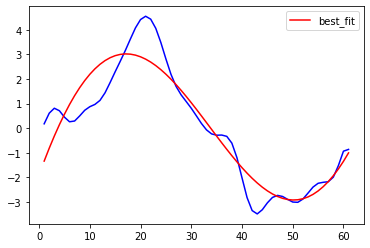

In [59]:
if __name__ == '__main__':
    # loads the csv file
    subdir = 'caltrans_processed_drive_cycles/data/1035198_1'
    file_name = '2012-05-22.csv'
    data = load_csv_data(file_name, subdir)
    # get a slice of the data with a relatively long driving pulse
    data = data.iloc[1002:1096,:]
    plt.plot(data.loc[:,'timestamp'], data.loc[:,'speed_mph'])
    plt.show()
    # get the slice of ONLY cruising period
    cruising_data = data.iloc[25:86,:]

    # create a numpy array of just t values starting at t=1
    t = np.linspace(1,len(cruising_data),len(cruising_data))
    # create a numpy array of speed_mph values
    y = cruising_data.loc[:,'speed_mph'].to_numpy()
    # initialise the DP object
    dp_obj = DP(t,y)
    # deduct the average from the cruising period speed values (from fig3a to fig3b) and store as y
    y = dp_obj.subtract_avg()

    original_y = y
    
    # perform NLLSR with the initial parameters suggested by LMParams
    hi = dp_obj.NLLSR(LF_Noise())
    plt.plot(t,y,'b')
    yy = hi.params['A1_FS'] * np.sin( (hi.params['w1_FS']*t) + hi.params['phi1_FS'])
    yy = yy + hi.params['A2_FS'] * np.sin( (hi.params['w2_FS']*t) + hi.params['phi2_FS'])
    yy = yy + hi.params['A3_FS'] * np.sin( (hi.params['w3_FS']*t) + hi.params['phi3_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
    # remove previous component of LF spectrum
    y = dp_obj.subtract(yy)
    reconstructed = yy


[[Variables]]
    A1_FS:   -0.70373768 +/- 0.11438714 (16.25%) (init = 10)
    A2_FS:   -0.59947795 +/- 0.07577671 (12.64%) (init = 10)
    A3_FS:    0.60135010 +/- 0.08825729 (14.68%) (init = 10)
    w1_FS:    0.19923081 +/- 0.01425915 (7.16%) (init = 0.1256637)
    w2_FS:    0.39110695 +/- 0.01087720 (2.78%) (init = 0.1884956)
    w3_FS:    0.28924744 +/- 0.01517390 (5.25%) (init = 0.1884956)
    phi1_FS: -0.56964965 +/- 0.54498354 (95.67%) (init = 0)
    phi2_FS: -2.92163330 +/- 0.40076159 (13.72%) (init = 0)
    phi3_FS:  1.77271867 +/- 0.72180988 (40.72%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(w1_FS, phi1_FS)   = -0.975
    C(w3_FS, phi3_FS)   = -0.962
    C(w2_FS, phi2_FS)   = -0.949
    C(phi1_FS, phi3_FS) = -0.947
    C(w1_FS, phi3_FS)   =  0.904
    C(w3_FS, phi1_FS)   =  0.880
    C(A1_FS, phi3_FS)   = -0.869
    C(phi2_FS, phi3_FS) = -0.838
    C(A1_FS, phi1_FS)   =  0.837
    C(A1_FS, w3_FS)     =  0.823
    C(A1_FS, w1_FS)     = -0.806
    

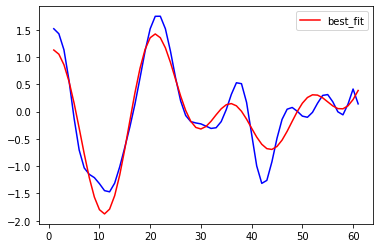

In [60]:
    # perform NLLSR with the initial parameters suggested by LMParams
    hi2 = dp_obj.NLLSR(MF_Noise())

    plt.plot(t,y,'b')
    yy = hi2.params['A1_FS'] * np.sin( (hi2.params['w1_FS']*t) + hi2.params['phi1_FS'])
    yy = yy + hi2.params['A2_FS'] * np.sin( (hi2.params['w2_FS']*t) + hi2.params['phi2_FS'])
    yy = yy + hi2.params['A3_FS'] * np.sin( (hi2.params['w3_FS']*t) + hi2.params['phi3_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
    # remove previous component of LF spectrum
    y = dp_obj.subtract(yy)
    reconstructed += yy

[[Variables]]
    A1_FS:   -0.01425127 (init = 1)
    A2_FS:    0.01397217 (init = 1)
    A3_FS:    1.00484106 (init = 1)
    w1_FS:    2.69221458 (init = 1.570796)
    w2_FS:    2.33977555 (init = 2.356194)
    w3_FS:    3.14159265 (init = 3.141593)
    phi1_FS:  0.81944504 (init = 0)
    phi2_FS: -0.58899874 (init = 0)
    phi3_FS:  0.00199677 (init = 0)


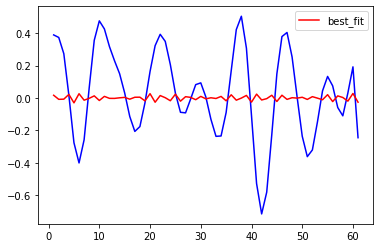

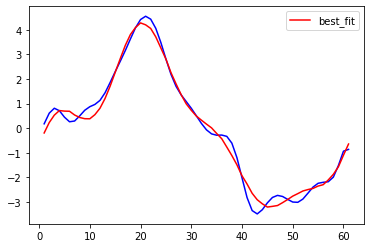

In [61]:
# perform NLLSR with the initial parameters suggested by LMParams
hi3 = dp_obj.NLLSR(HF_Noise())
plt.plot(t,y,'b')
yy = hi3.params['A1_FS'] * np.sin( (hi3.params['w1_FS']*t) + hi3.params['phi1_FS'])
yy = yy + hi3.params['A2_FS'] * np.sin( (hi3.params['w2_FS']*t) + hi3.params['phi2_FS'])
yy = yy + hi3.params['A3_FS'] * np.sin( (hi3.params['w3_FS']*t) + hi3.params['phi3_FS'])
plt.plot(t, yy,'r', label = 'best_fit')
plt.legend(loc='best')
plt.show()
# remove previous component of LF spectrum
y = dp_obj.subtract(yy)
reconstructed += yy

plt.plot(t,original_y,'b')
plt.plot(t, reconstructed,'r', label = 'best_fit')
plt.legend(loc='best')
plt.show()

